Imports

In [15]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Connection to database

In [2]:
db = 'ign_naturstyrelsen'
user = 'edin'
password = ''
host = '10.0.1.30'

connection_string = f'postgresql+psycopg2://{user}:{password}@{host}/{db}'

con = create_engine(connection_string)

Get number of devices in database

In [6]:
route_devices_sql = "SELECT COUNT(*) FROM (SELECT DISTINCT device_id FROM route) as temp"
all_devices_sql = "SELECT COUNT(*) from device"
n_route_devices = con.execute(route_devices_sql).first()[0]
n_devices = con.execute(all_devices_sql).first()[0]
print('{} devices analyzed ({:.2f}%)'.format(n_route_devices, n_route_devices/n_devices*100))

45210 devices analyzed (55.46%)


In [9]:
device_route_count_sql = "SELECT device_id, COUNT(*) FROM route where n_points > 1 GROUP BY device_id"
n_points_sql = "SELECT n_points FROM route where n_points > 1"
device_route_count_df = pd.read_sql(device_route_count_sql, con)
n_points_df = pd.read_sql(n_points_sql, con)

44400 devices with routes
Median 3 routes per device


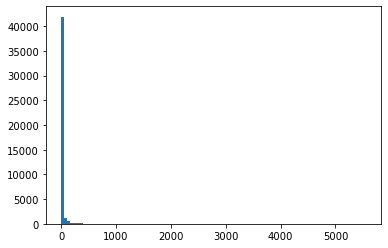

In [23]:
print('{} devices with routes'.format(len(device_route_count_df)))
print('Median {} routes per device'.format(int(np.median(device_route_count_df['count']))))
device_route_hist = plt.hist(device_route_count_df['count'], 100)

In [31]:
print('{} routes with more than one point'.format(len(n_points_df)))
print('Median {} points per route'.format(int(np.median(n_points_df['n_points']))))
n_points_hist = plt.hist(n_points_df['n_points'], 100)

{} routes with more than one point


AttributeError: 'NoneType' object has no attribute 'format'